# The Effect of the Filter
# Upon Haplotypes

###### From  constructed haplotypes, filter this data to generate new haplotype data for each sample and visualize the effect of our filter. 

#### Import needed moduals

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import cryptofxns
import os
from os import listdir
from matplotlib import pyplot as plt
%matplotlib inline

## Set local variables 

In [2]:
mod = .1;s = 0;ymod = 1;yla = -.5;ylb = 1.5;
xlim0 = -100000;xlim1 = 500000;xdi = 4.0;
k1s = range(500,11000,500);Method = 'min'
alvl =.3;centcolor='red';snpcolor='black';

### Load Genotype files, centromere locations, and chromosome length

In [3]:
genodf = cryptofxns.geno_df;genodf.shape
centromere = cryptofxns.load_centrom_locs()
clens = cryptofxns.chromosome_lengths
tc = cryptofxns.thecol

### Find Chromosome and gather samples

In [4]:
chrlist = np.unique(genodf.Chrom).tolist()
segs_parents = genodf.columns.tolist()[tc:];
seg_drop = cryptofxns.geno_remove;print seg_drop
segs_bi = list(np.concatenate(cryptofxns.axalp))
segs = [s for s in segs_parents if s not in ['SS-A837','XL280','XL280a']+seg_drop]
len(segs)

['SS-B377', 'SS-B385', 'SS-B410', 'SS-B411', 'SS-B560', 'SS-B395', 'SS-B411', 'SS-B594', 'SS-C273', 'SS-B879', 'SS-B885', 'SS-B593']


94

### Set folder paths

In [5]:
folders = ['IMI/','BPS/','HAP/','FGT/','FIG/']

CHRPATHS = ['../FILES/CHR' + str(i) +'/' for i in range(1,len(clens)+1)];CHRPATHS[0]

FILECHRPATHS = [ [chp + f for f in folders] for chp in CHRPATHS];

HAPFILES = [f[2] for f in FILECHRPATHS];HAPFILES[:2]

['../FILES/CHR1/HAP/', '../FILES/CHR2/HAP/']

In [6]:
HAPFILESDIR = []
for ch,HAPF in enumerate(HAPFILES):
    FORCHROM = []
    for dirs in listdir(HAPF):
        if len(listdir(HAPF+dirs)) > 0:
            SEG = HAPF+dirs+'/'+listdir(HAPF+dirs)[0] ## The unfiltered Haplotype
        else:
            pass
        FORCHROM.append(SEG)
    HAPFILESDIR.append(FORCHROM)

In [7]:
HAPFILESDIR[0][0][:-7]

'../FILES/CHR1/HAP/SS-B307/SS-B307-min-haplotype'

In [8]:
test = pd.read_csv(HAPFILESDIR[0][0])

In [9]:
test

,v,w,nb,genotype
0,5016.0,636021.0,631006,1.0
1,636099.0,636099.0,1,0.0
2,636109.0,1599775.0,963667,1.0
3,1599976.0,2297181.0,697206,0.0


# Filter Haplotypes

### Bring the unfiltered haplotype into the environment then use our filter ftn

### Then save the new data

#### NOTE: If you have not already generated haplotypes then uncomment the code below and run. Else, skip

for k1 in k1s:
    for ch,chrom in enumerate(chrlist):
        clen = clens[ch]; 
        for SEGHAPPATH in HAPFILESDIR[ch]:
            hapdf = pd.read_csv(SEGHAPPATH);
            hap = cryptofxns.haplotype_filter(hapdf,k1);
            hap.to_csv(SEGHAPPATH[:-7]+ '-k%s'%k1+ '.csv',index=False);

# Analysis of filter effect

## Calculate total number of recombination events for those filter sizes

## Gather all the files

In [10]:
Events = []
for k1 in [0] + k1s:
    genotype_changes = sum([sum([len(pd.read_csv(SEGHAPPATH[:-7]+ '-k%s'%k1+ '.csv'))-1 
                                for SEGHAPPATH in HAPFILESDIR[ch]]) for ch,chrom in enumerate(chrlist)])
    Events.append(genotype_changes)

In [11]:
SEGHAPPATH

'../FILES/CHR14/HAP/SS-C291/SS-C291-min-haplotype-k0.csv'

In [12]:
SEGHAPPATH.split('/')[4]

'SS-C291'

### Model effect of fliter on zero crossovers per chromosome

In [21]:
k1s_zeros = []
for k1 in [0] + k1s:
    k1_zerosb = [];k1_zerosu = []
    for ch,chrom in enumerate(chrlist):
        for SEGHAPPATH in HAPFILESDIR[ch]:
            a = len(pd.read_csv(SEGHAPPATH[:-7]+ '-k%s'%k1+ '.csv'))-1
            the_seg = SEGHAPPATH.split('/')[4]
            if a == 0:
                if the_seg in segs_bi: ## Seperate via corss type
                    k1_zerosb.append([the_seg,chrom]);
                else:
                    k1_zerosu.append([the_seg,chrom]);
            else:
                pass
    k1s_zeros.append([k1_zerosb,k1_zerosu])

In [22]:
print len(Events);assert len(k1s_zeros) == len(Events)

22


## Caluclate the difference

In [15]:
AntiEvents = [0] + [Events[0]-E for E in Events[1:]]

In [16]:
len(AntiEvents)

22

## Plot results for number of genotype changes detected as ftn of fliter size

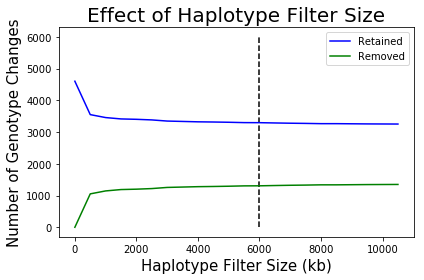

In [17]:
plt.plot(np.array([0]+k1s),np.array(Events),'blue',label='Retained');
plt.plot(np.array([0]+k1s),np.array(AntiEvents),'g',label='Removed');
plt.xlabel('Haplotype Filter Size (kb)',fontsize=15);
plt.ylabel('Number of Genotype Changes',fontsize=15);
plt.legend();
plt.vlines(6000,0,6000,color='k',linestyles='--'); ## Our chosen K1 filter Jan 28th 2017
plt.title('Effect of Haplotype Filter Size',fontsize=20);
plt.tight_layout();
plt.savefig('../FIGS/Crypto-Effect-Haplotype-Filter-Jul2017.jpeg');

## Plot results: effect of fliter size on chromosomes with zero crossovers

In [32]:
bi_zeros_g = np.array([len(zch[0]) for zch in k1s_zeros]);
un_zeros_g = np.array([len(zch[1]) for zch in k1s_zeros]);

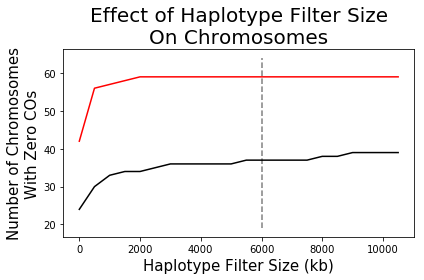

In [33]:
plt.plot(np.array([0]+k1s),bi_zeros_g,'black',label='From Opposite Sex');
plt.plot(np.array([0]+k1s),un_zeros_g,'red',label='From Same Sex');
plt.xlabel('Haplotype Filter Size (kb)',fontsize=15);
plt.ylabel('Number of Chromosomes\nWith Zero COs',fontsize=15);
maxy = max([max(bi_zeros_g),max(un_zeros_g)])+5
miny = min([min(bi_zeros_g),min(un_zeros_g)])-5
plt.vlines(6000,miny,maxy,color='grey',linestyles='--'); ## Our chosen K1 filter Jan 28th 2017
plt.title('Effect of Haplotype Filter Size\nOn Chromosomes',fontsize=20);
plt.tight_layout();
plt.savefig('../FIGS/Crypto-Effect-Haplotype-Filter-Zeros-Jul2017.jpeg');

## Number of unique segregants with zero crossovers

In [45]:
len(k1s_zeros)

22

In [79]:
bi_segs_wz = [[seg[0] for seg in zch[0]] for zch in k1s_zeros];N_bi_wz = [len(np.unique(b)) for b in bi_segs_wz]
un_segs_wz = [[seg[0] for seg in zch[1]] for zch in k1s_zeros];N_un_wz = [len(np.unique(b)) for b in un_segs_wz]

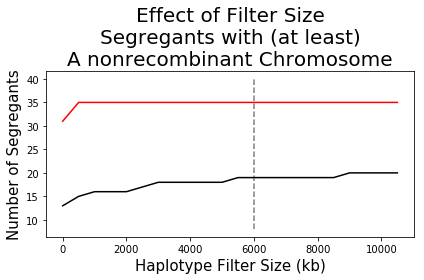

In [83]:
plt.plot(np.array([0]+k1s),N_bi_wz,'black',label='From Opposite Sex');
plt.plot(np.array([0]+k1s),N_un_wz,'red',label='From Same Sex');
plt.xlabel('Haplotype Filter Size (kb)',fontsize=15);
plt.ylabel('Number of Segregants',fontsize=15);
maxy = max([max(N_bi_wz),max(N_un_wz)])+5
miny = min([min(N_bi_wz),min(N_un_wz)])-5
plt.vlines(6000,miny,maxy,color='grey',linestyles='--'); ## Our chosen K1 filter Jan 28th 2017
plt.title('Effect of Filter Size\nSegregants with (at least)\nA nonrecombinant Chromosome',fontsize=20);
plt.tight_layout();
plt.savefig('../FIGS/Crypto-Effect-Haplotype-Filter-Segs-Zeros-Jul2017.jpeg');

# Conclusions

From our results above, I will use a haplotype filter size of 6kb.